<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-07-24 17:49:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  19.1MB/s    in 1.8s    

2021-07-24 17:49:23 (19.1 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [12]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

,sql
0,"CREATE TABLE ""master"" (\n""index"" INTEGER,\n ""..."


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [13]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


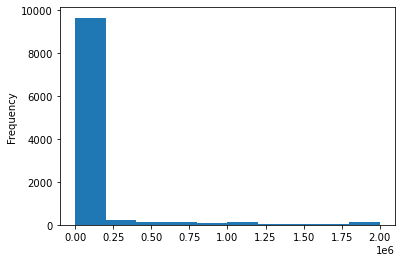

In [14]:
df['ConvertedComp'].plot(kind = 'hist')

### Box Plots


Plot a box plot of `Age.`


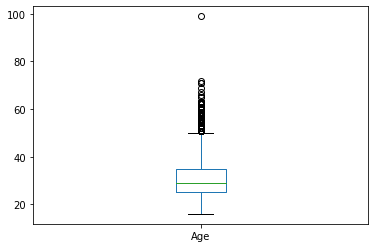

In [15]:
# your code goes here

df['Age'].plot(kind = 'box')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


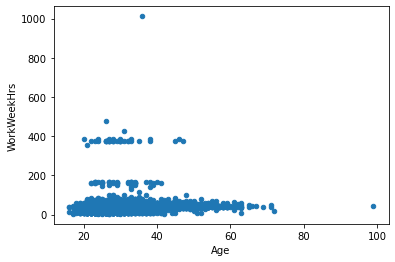

In [16]:
# your code goes here

df.plot(kind = 'scatter', x = 'Age', y= 'WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


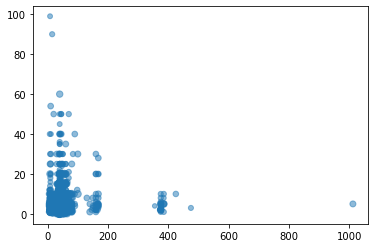

In [44]:
# your code goes here
bubble_size=df['Age']
plt.scatter(df['WorkWeekHrs'],df['CodeRevHrs'],s=df['Age'],alpha=0.5)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
Cassandra               1003
Oracle                   870
Other(s):                645
Couchbase                390
Name: DatabaseDesireNextYear, dtype: int64


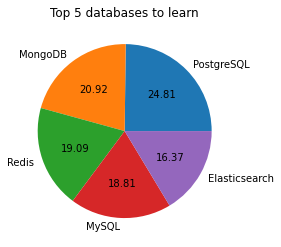

In [51]:
# your code goes here
# your code goes here
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_db = pd.read_sql_query(QUERY,conn)
print(df_db['DatabaseDesireNextYear'].value_counts())
df_count=df_db['DatabaseDesireNextYear'].value_counts().rename_axis('DatabaseName').reset_index(name='Counts')
df_top5=df_count[:5].copy()

plt.pie(df_top5['Counts'],labels=df_top5['DatabaseName'],autopct='%.2f')
plt.title('Top 5 databases to learn')
plt.show()

In [29]:
import matplotlib.pyplot as plt

In [52]:
QUERY1 = """
SELECT COUNT(*)
FROM DatabaseDesireNextYear
WHERE DatabaseDesireNextYear LIKE "%SQL%"
"""
pd.read_sql_query(QUERY1,conn)

,COUNT(*)
0,12752


([<matplotlib.patches.Wedge at 0x7f1751c6cc50>,
 [Text(0.9857846344184704, 0.48808672850677154, 'PostgreSQL'),
  Text(0.28672257415602354, 1.0619746538733135, 'MongoDB'),
  Text(-0.5057557889385133, 0.9768372853014888, 'Redis'),
  Text(-1.0171094579200082, 0.41891329724618115, 'MySQL'),
  Text(-1.0626870632431884, -0.2840707757154334, 'Elasticsearch'),
  Text(-0.7243043449886339, -0.8278787446423457, 'Microsoft SQL Server'),
  Text(-0.18876221106430982, -1.0836829922417872, 'SQLite'),
  Text(0.2845787695229511, -1.06255113944544, 'Firebase'),
  Text(0.6065717409942596, -0.9176441156718617, 'MariaDB'),
  Text(0.8206442592287718, -0.7324909554355333, 'DynamoDB'),
  Text(0.9593421550997335, -0.5382031488653694, 'Cassandra'),
  Text(1.0467922731335007, -0.3379732783934236, 'Oracle'),
  Text(1.0874219646857932, -0.16587185029078774, 'Other(s):'),
  Text(1.099056203324344, -0.04555723800098172, 'Couchbase')])

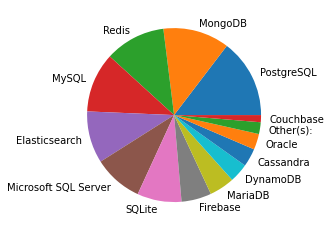

In [42]:
plt.pie(s, labels = s.keys())


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


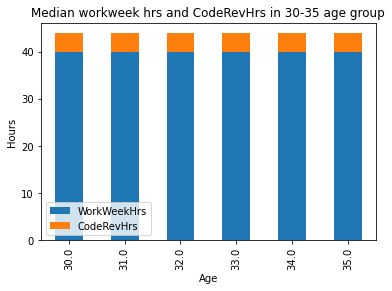

In [53]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_wk = pd.read_sql_query(QUERY,conn)

df_g=df_wk.groupby('Age').median()

df_g.plot(kind='bar',stacked=True)
plt.title('Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()


In [56]:
QUERY1 = """
SELECT *
FROM LanguageWorkedWith
"""
df_lang = pd.read_sql_query(QUERY1,conn)
df_lang['LanguageWorkedWith'].value_counts()

JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
Name: LanguageWorkedWith, dtype: int64

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


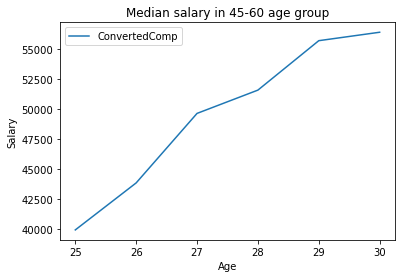

In [59]:
# your code goes here
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
"""
df_ac = pd.read_sql_query(QUERY,conn)

df_gr=df_ac.groupby('Age').median()

df_gr.plot(kind='line')
plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


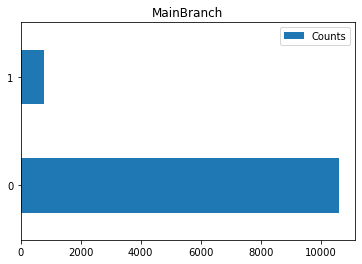

In [58]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df_mb = pd.read_sql_query(QUERY,conn)
df_cnt=df_mb['MainBranch'].value_counts().rename_axis('MainBranch').reset_index(name='Counts')

df_cnt.plot(kind='barh')
plt.title('MainBranch')
plt.show()


In [61]:
QUERY = """
SELECT *
FROM DEVTYPE
"""
df_type = pd.read_sql_query(QUERY,conn)
df_type.head()
df_type['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
